## Sistema de Recomendación 
### Michael Mendoza

Este proyecto se basa en un sistema de recomendación usando el algoritmo de factorización de matrices. 

El dataset usando para generar el entrenamiento está relacionado con la personalidad de los usuarios, sin embargo, para este trabajo solo nos enfocamos en realizar recomendaciones sin tener en cuenta las personalidades.


In [257]:
# dependecies for every section
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd 
from sklearn.neighbors import NearestNeighbors  

In [258]:
# loading data
dfp = pd.read_csv('personality-data.csv')
dfr = pd.read_csv('ratings.csv')

In [259]:
dfp

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,...,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,...,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,cff910b71f09b3120289ff6b461a9e03,5.5,3.5,2.5,4.0,5.5,popularity,low,108979,4.246346,...,6643,4.409108,115122,3.960470,7700,4.178546,67997,4.085300,3,3
1830,1ab3a4c2921d8da640854819b0f6cfce,4.0,3.5,4.5,4.0,2.5,serendipity,high,93040,4.227140,...,5618,4.149697,903,4.116152,38061,4.155210,1197,4.045751,3,4
1831,a06386edadf3bc614dadb7044708c46c,6.0,3.0,5.5,3.5,6.0,serendipity,low,106173,3.935297,...,26519,3.998642,89707,4.144870,2571,3.860041,108709,3.899857,3,4
1832,bad56d9506832cd79d874a6b66b3d813,5.0,3.5,1.5,3.5,2.5,serendipity,medium,6874,4.241766,...,92259,4.819710,32,4.059369,3730,4.427336,3435,4.844386,4,4


In [260]:
dfr

,useri,movie_id,rating,tstamp
0,8e7cebf9a234c064b75016249f2ac65e,1,5.0,2001-09-10 17:19:56
1,8e7cebf9a234c064b75016249f2ac65e,2,4.0,2001-09-28 11:34:55
2,8e7cebf9a234c064b75016249f2ac65e,3,4.0,2001-09-28 11:42:50
3,8e7cebf9a234c064b75016249f2ac65e,5,5.0,2001-09-28 11:27:30
4,8e7cebf9a234c064b75016249f2ac65e,6,4.0,2002-01-07 18:12:02
...,...,...,...,...
1028746,721ea658e148fc0f76ddd6e2b0e02422,95167,1.5,2015-10-14 10:39:15
1028747,721ea658e148fc0f76ddd6e2b0e02422,103335,4.5,2015-10-14 10:21:55
1028748,721ea658e148fc0f76ddd6e2b0e02422,104374,3.5,2015-10-12 01:05:38
1028749,721ea658e148fc0f76ddd6e2b0e02422,107890,4.0,2015-10-14 05:30:08


Se construye el conjunto de entrenamiento (matriz) usando todos los usuarios del archivo personality-data.csv y las primeras 2000 películas. 

In [261]:
#Se extraen los valores del Dataframe
id_usuarioP=dfp.values[:,:1]
id_pelicula=dfr.values[0:2000,1:2]
rating=dfr.values[:,0:3]

#Se crea un arreglo numpy de usuario
usuario=np.array(id_usuarioP)

#usuario.flatten : se utiliza para obtener una copia de la matriz dada, contraída en una dimensión.
usuarioDic=dict(enumerate(usuario.flatten(),1))

#print(rating[2,0])
#idU= id_usuario.to_dict('index')
#print(idU[0].values())

X = np.zeros((len(id_usuarioP),len(id_pelicula)))
print(X.shape)
#Xaux=np.zeros((len(id_usuario),len(rating)) 


(1834, 2000)


In [262]:
def findPosById (idUser):
    posId=0
    for key,value in usuarioDic.items():
            if idUser == value:
                 posId= key
    return posId
 
for i in range(len(rating)):
        userPos=findPosById(rating[i,0])-1
        moviePos=rating[i,1]-1
        ranking=rating[i,2]
        
        if moviePos<2000:
             X[userPos,moviePos]=ranking


print(X)



[[5.  4.  4.  ... 0.  4.  5. ]
 [0.  2.5 0.  ... 0.  0.  4. ]
 [3.5 0.  0.  ... 0.  0.  3.5]
 ...
 [4.  0.  0.  ... 0.  0.  0. ]
 [3.5 3.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]


In [263]:
def matrix_factorization(R, P, Q, K, error_esperado, steps=1000, alpha=0.0002, beta=0.02):
    Q = Q.T
    n_iteraciones = 0
    err_anterior = 0
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
                        
        err_relativo = abs((e - err_anterior) / e)                
        if err_relativo < error_esperado:
            break
        else:
            err_anterior = e
            n_iteraciones += 1
            continue 
    return P, Q.T, n_iteraciones

In [264]:
def vecinos_mas_cercanos(x,n_vecinos,usuario):
    nbrs = NearestNeighbors(n_neighbors=n_vecinos, algorithm='auto').fit(x)
    distances, indices = nbrs.kneighbors(usuario)
    
    R = np.zeros((n_vecinos,len(x[0])))
    indice = indices[0]    
  
    for i in range(len(indice)):
        R[i]=x[indice[i]]

    return R

    
def generar_recomendacion(usuario):    
    
    matrizUsuario=np.array([usuario])
    R = vecinos_mas_cercanos(X,6,matrizUsuario)
    K = 100
    np.random.seed(0)
    P = np.random.rand(len(id_usuarioP),K)
    Q = np.random.rand(len(id_pelicula),K)
   
    P,Q,n_iteraciones = matrix_factorization(R,P,Q,K,0.058)
    Rp = P@Q.T

    return Rp,n_iteraciones
    
            
def calcularNumeroPeliculas(matrixRecomendacion):
    cont=0
    for i in range(len(matrixRecomendacion)):
        if(matrixRecomendacion[i] > 4):
            cont+=1
    
    return cont          

Usando factorización de matrices y vecinos más cercanos se realizo recomendaciones para los siguiente usuario del dataset:

77c7d756a093150d4377720abeaeef76

b7e8a92987a530cc368719a0e60e26a3

cd3006656ff803042fd9ac99a3f0f9f5

8ac8c1588001588317a6a07b3da2ee2a

fc0c2102480e72b1f4bb5f651b2385f2

c8b6a7879731a1c4508d5edb581544d9

64d1e60cade97f3f701aa5348c320a74

Cada recomendación tiene como resultado: 
El número de iteraciones.
Número de películas recomendadas (calificación mayor a 4).
Gráfico comparativo entre las películas recomendadas para cada usuario en el archivo personality-data.csv vs las recomendaciones obtenidas por usted en las mismas películas.  


In [265]:
n_iteraciones=0
user=findPosById('77c7d756a093150d4377720abeaeef76')
r1,n_iteraciones = generar_recomendacion(X[user])
iteracion=n_iteraciones
numPeliculas=calcularNumeroPeliculas(r1[0])
#print(r1[0])


print("Numero peliculas recomendadas: ",numPeliculas)  
print("Numero total de iteraciones: ",n_iteraciones) 


Numero peliculas recomendadas:  680
Numero total de iteraciones:  6


In [266]:
n_iteraciones=0
user=findPosById('b7e8a92987a530cc368719a0e60e26a3')
r2,n_iteraciones = generar_recomendacion(X[user])
iteracion=n_iteraciones
numPeliculas=calcularNumeroPeliculas(r2[0])
#print(r1[0])


print("Numero peliculas recomendadas: ",numPeliculas)  
print("Numero total de iteraciones: ",n_iteraciones) 

Numero peliculas recomendadas:  698
Numero total de iteraciones:  2


In [267]:
n_iteraciones=0
user=findPosById('cd3006656ff803042fd9ac99a3f0f9f5')
r3,n_iteraciones = generar_recomendacion(X[user])
iteracion=n_iteraciones
numPeliculas=calcularNumeroPeliculas(r3[0])
#print(r1[0])


print("Numero peliculas recomendadas: ",numPeliculas)  
print("Numero total de iteraciones: ",n_iteraciones) 

Numero peliculas recomendadas:  113
Numero total de iteraciones:  11


In [268]:
n_iteraciones=0
user=findPosById('8ac8c1588001588317a6a07b3da2ee2a')
r4,n_iteraciones = generar_recomendacion(X[user])
iteracion=n_iteraciones
numPeliculas=calcularNumeroPeliculas(r4[0])
#print(r1[0])


print("Numero peliculas recomendadas: ",numPeliculas)  
print("Numero total de iteraciones: ",n_iteraciones) 

Numero peliculas recomendadas:  1456
Numero total de iteraciones:  12


In [269]:
n_iteraciones=0
user=findPosById('fc0c2102480e72b1f4bb5f651b2385f2')
r5,n_iteraciones = generar_recomendacion(X[user])
iteracion=n_iteraciones
numPeliculas=calcularNumeroPeliculas(r5[0])
#print(r1[0])


print("Numero peliculas recomendadas: ",numPeliculas)  
print("Numero total de iteraciones: ",n_iteraciones) 

Numero peliculas recomendadas:  1657
Numero total de iteraciones:  10


In [270]:
n_iteraciones=0
user=findPosById('c8b6a7879731a1c4508d5edb581544d9')
r6,n_iteraciones = generar_recomendacion(X[user])
iteracion=n_iteraciones
numPeliculas=calcularNumeroPeliculas(r6[0])
#print(r1[0])


print("Numero peliculas recomendadas: ",numPeliculas)  
print("Numero total de iteraciones: ",n_iteraciones) 

Numero peliculas recomendadas:  1083
Numero total de iteraciones:  12


In [271]:
n_iteraciones=0
user=findPosById('64d1e60cade97f3f701aa5348c320a74')
r7,n_iteraciones = generar_recomendacion(X[user])
iteracion=n_iteraciones
numPeliculas=calcularNumeroPeliculas(r7[0])
#print(r1[0])


print("Numero peliculas recomendadas: ",numPeliculas)  
print("Numero total de iteraciones: ",n_iteraciones) 

Numero peliculas recomendadas:  1714
Numero total de iteraciones:  29


Text(0, 0.5, 'Y')

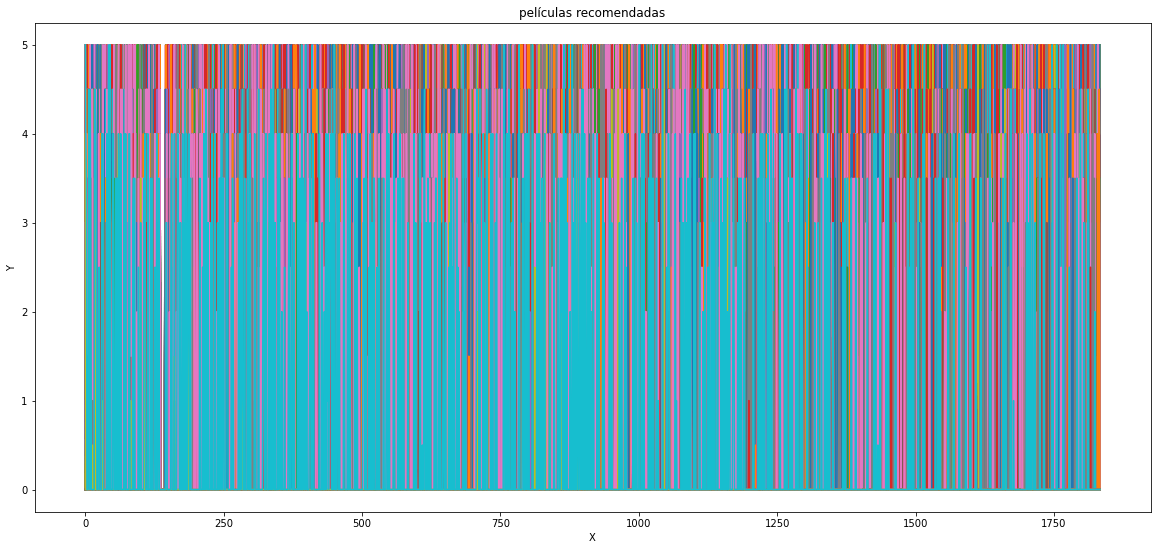

In [256]:
plt.figure(figsize=[20,9])
plt.plot(X)
plt.title('películas recomendadas')
plt.xlabel('X')
plt.ylabel('Y')